In [28]:
import pandas as pd
import numpy as np

from cycler import cycler
import matplotlib as mpl
from matplotlib import rc
import matplotlib.pyplot as plt

In [52]:
# raw data
out_fld = "/mnt/datasets/uc5/meta/iuchest/"
df = pd.read_csv("/mnt/datasets/uc5/meta/iuchest/reports_raw.tsv", sep="\t").set_index("id")
print("shape", df.shape)
display(df.T)

shape (3955, 11)


id,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
comparison,None.,Chest radiographs XXXX.,None.,XXXX PA and lateral chest radiographs,None,NaN,NaN,Two views of the chest dated XXXX.,None.,NaN,...,Two-view chest from XXXX.,Rib radiographs dated XXXX.,None,None.,XXXX,"XXXX, XXXX.",NaN,Chest x-XXXX dated XXXX at XXXX hours.,None.,None
indication,Positive TB test,"XXXX-year-old male, chest pain.",NaN,"XXXX-year-old male, XXXX.","dyspnea, subjective fevers, arthritis, immigra...",History of chest pain,Acute bronchitis.,XXXX-year-old with XXXX for one month. History...,Pruritic.,",786.05 XXXX XXXX to XXXX",...,XXXX-year-old male with altered mental status.,XXXX-year-old with pneumonia. Shortness of bre...,MELANOMA,possible tuberculosis,XXXX for one XXXX,SP CABG SOB NO RALES,chest pain.,"XXXX-year-old female, transplant workup.",XXXX-year-old XXXX with pain.,Chest pain
findings,The cardiac silhouette and mediastinum size ar...,The cardiomediastinal silhouette is within nor...,Both lungs are clear and expanded. Heart and m...,There is XXXX increased opacity within the rig...,Interstitial markings are diffusely prominent ...,NaN,Heart size and pulmonary vascularity appear wi...,"The heart, pulmonary XXXX and mediastinum are ...",Cardiac and mediastinal contours are within no...,The lungs appear clear. There are no focal air...,...,Heart size within normal limits. No focal airs...,The heart size is upper limits of normal. The ...,There are bilateral pulmonary nodules whose ap...,Heart size normal. Lungs are clear. XXXX are n...,The lungs are clear. The cardiomediastinal sil...,Sternotomy sutures and bypass grafts have been...,NaN,Calcified mediastinal XXXX. No focal areas of ...,Cardiomediastinal silhouette demonstrates norm...,Lungs are clear bilaterally. There is no focal...
impression,Normal chest x-XXXX.,No acute cardiopulmonary process.,No active disease.,1. Increased opacity in the right upper lobe w...,Diffuse fibrosis. No visible focal acute disease.,Status post left mastectomy. Heart size normal...,1. Retrocardiac soft tissue density. The appea...,No acute cardiopulmonary disease.,No acute findings.,No acute cardiopulmonary disease.,...,No acute cardiopulmonary findings.,Minimal perihilar opacity which could indicate...,1. Bilateral pulmonary nodules suggesting pulm...,Normal chest No evidence of tuberculosis,Negative chest .,Post operative chest with no acute disease.,Heart size is normal and lungs are clear. No p...,No acute cardiopulmonary abnormality. .,No acute cardiopulmonary abnormality.,No acute cardiopulmonary abnormality.
major_mesh,['normal'],['Calcified Granuloma/lung/upper lobe/right'],['normal'],"['Opacity/lung/upper lobe/right', 'Pulmonary A...",['Markings/lung/bilateral/interstitial/diffuse...,['Mastectomy/left'],"['Density/retrocardiac', 'Calcinosis/blood ves...","['Aorta/tortuous', 'Shoulder/bilateral/degener...",['normal'],['normal'],...,['normal'],['Opacity/lung/hilum/streaky/mild'],"['Nodule/lung/bilateral/multiple', 'Surgical I...",['normal'],['normal'],['Sutures/sternum'],['normal'],"['Calcinosis/mediastinum', 'Thoracic Vertebrae...","['Atherosclerosis/aorta, thoracic', 'Aorta, Th...",['normal']
auto_term,[],['calcified granuloma'],[],"['atelectases', 'mass lesion', 'opacity', 'Ate...","['diffuse fibrosis', 'Fibrosis', 'Pulmonary Fi...","['mastectomies', 'Mastectomy', 'surgery']","['atelectases', 'calcified granuloma', 'hiatal...",['degenerative change'],[],[],...,[],"['atypical pneumonias', 'opacity']","['metastatic disease', 'nodule', 'opacity', 'p...",[],[],"['bypass grafts', 'sternotomy', 'Coronary Arte...",[],['degenerative change'],"['atheroscleroses', 'degenerative disc disease...",[]
image_filename,"['CXR1_1_IM-0001-3001.png', 'CXR1_1_IM-0001-40...","['CXR10_IM-0002-1001.png', 'CXR10_IM-0002-2001...","['CXR100_IM-0002-1001.png', 'CXR100_IM-0002-20...","['CXR1000_IM-0003-1001.png', 'CXR1000_IM-0003-...","['CXR1001_IM-0004-1001.png', 'CXR1001_IM-0004-...","[

In [56]:
rc("font", **{"family": "sans-serif", "sans-serif":["Helvetica"], "size":8})
## for Palatino and other serif fonts use:
rc("font", **{"family":"serif", "serif":["Computer Modern"], "size":8})
rc("text", usetex=True)
rc("figure", **{"dpi": 300})
rc("lines", **{"linewidth": 1, "markersize": 2})
rc("axes", **{"edgecolor": "gray", "facecolor":"white", 
              "linewidth": 0.3, "labelsize": 8, "labelcolor": "gray",
              "grid": True})
rc("grid", **{"color": "lightgray", "linestyle": (0, (1, 3)), "linewidth": 0.3, "alpha": 1})
rc("legend", **{"facecolor": "grey", "markerscale": 0.7, "fontsize": 8, "framealpha": 0.1, "frameon":True, "edgecolor": "lightgray"})
rc("figure", **{"facecolor":"white", "edgecolor":"white"})

tick_color="black"
tick_fontsize=8
rc("xtick", **{"color": tick_color, "labelsize":tick_fontsize, "major.width": 0.2, "major.size":3, "major.pad":2})
rc("ytick", **{"color": tick_color, "labelsize":tick_fontsize, "major.width": 0.2, "major.size":3, "major.pad":2})

color_c    = cycler("color", ["k"])
style_c    = cycler("linestyle", ["-", "--", ":", "-."])
marker_c    = cycler("marker", ["", ".", "o"])
cycler_cms = color_c * marker_c * style_c
# c_csm = color_c * style_c * markr_c

color_c   = cycler("color", ["black", "gray", "darkgray", "lightgray"])
style_c   = cycler("linestyle", ["-", "--", "-."])
cycler_cs = style_c * color_c

cm = 1/2.54  # centimeters in inches
image_width  = 10 * cm
image_height = image_width / 1.618

Number of raw reports:  3955
Number of 
2    3208
1     446
3     181
0     104
4      15
5       1
Name: n_images, dtype: int64
Number of images: 7470


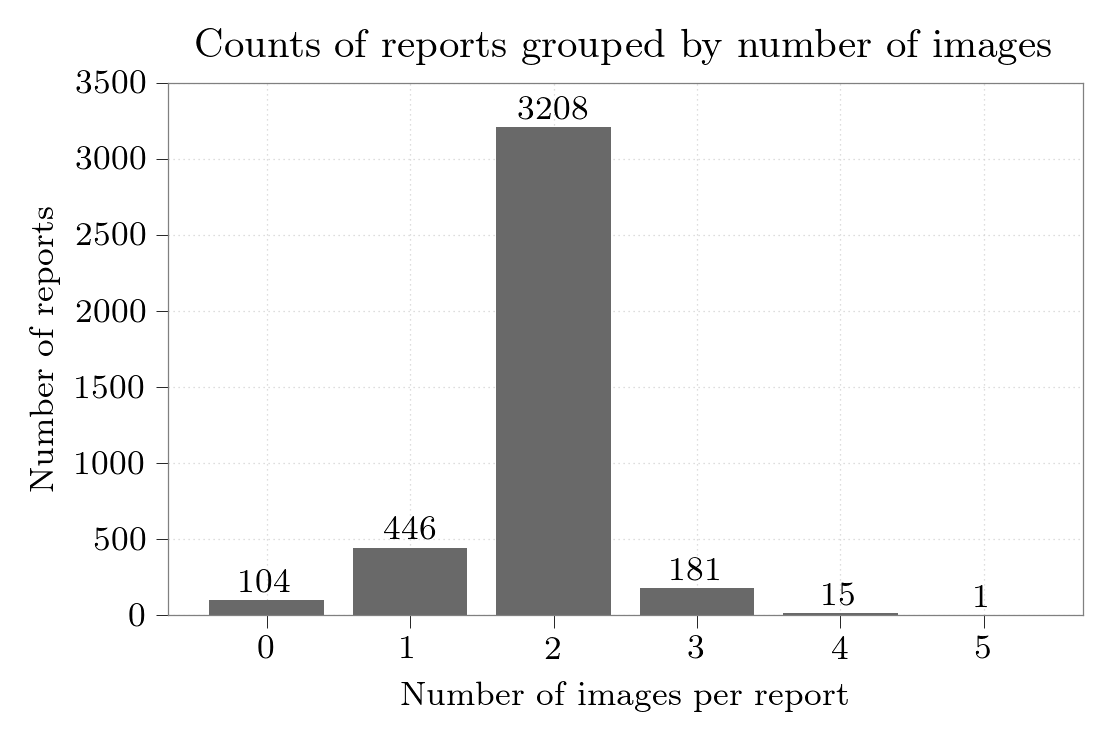

In [57]:
plt.close()
# number of raw reports
plt.rc("axes", prop_cycle=cycler_cms)

print("Number of raw reports: ", len(df))
print("Number of ")
print(df.n_images.value_counts())
print("Number of images:", df.n_images.sum())
# n_imgs = pd.Series( {0:200, 1:456, 2: 3212, 3:150, 4:20, 5:1})
n_imgs = df.n_images.value_counts()
fig, ax = plt.subplots(figsize=(image_width, image_height))

ax.bar(n_imgs.index.values, n_imgs.to_numpy(), color="dimgray", alpha=1) 

rects = ax.patches
for rect, label in zip(rects, n_imgs.to_numpy()):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.yscale("linear")
ax.set_ylim([0, 3500])
# locs = [1, 100, 1000, 3000, 6000]
# plt.yticks(locs, locs)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

ax.set_axisbelow(True)
ax.set_xlabel("Number of images per report")
ax.set_ylabel("Number of reports")
ax.set_title("Counts of reports grouped by number of images")
plt.subplots_adjust(bottom=0.15)

# plt.savefig("images_per_report.png", dpi=300)

/root/miniconda3/envs/eddl/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 12 x 9 in image.
/root/miniconda3/envs/eddl/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figs/reports_images_bars.pdf


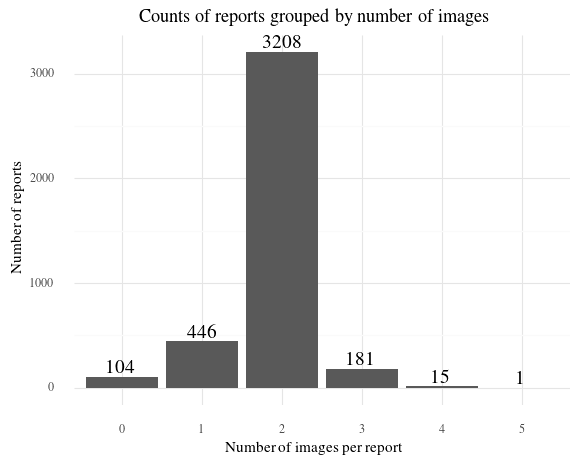

<ggplot: (8751969755877)>

In [59]:
from plotnine import *
from posixpath import join

p1 = ( ggplot(data=df,
        mapping=aes(x="factor(n_images)"))
        + geom_bar()
        + geom_text(
            aes(label=after_stat("count")),
            stat="count",
            nudge_y=0.125,
            va="bottom",
            parse = True,
            size = 14,
            family="LiberationSerifNarrow"
        )
        + labs(title="Counts of reports grouped by number of images", x="Number of images per report", y="Number of reports")
        + theme(figure_size=(15, 4), text=element_text(family="LiberationSerifNarrow", size=20)) + theme_minimal()
)

import os
os.makedirs("figs", exist_ok=True)
p1.save( join("figs", "reports_images_bars.pdf"), width=12, height=9, dpi=300)
p1